# Dataset preparation for embedding generation

In [1]:
using Flux
using DataFrames
using CSV
using Plots
using StatsBase
using Random
using LSHFunctions
using Metrics
using JLD2, FileIO
using Word2Vec
using XLSX

In [2]:
import Dates

In [3]:
#loading the dataset
path = "Datasetq1.csv"
df1 = DataFrame(CSV.File(path))

,storenum,item_key,item_description,transaction_type,sales_amount,sales_channel
,Int64,Int64,String,String,Float64,String
1,505,44158,*PF OR Thighs,M,0.0,Eat In (EI)
2,505,1,CASH,T,6.26168,Eat In (EI)
3,505,915855,1(OR)BPKT BX,M,8.3645,Take Away (TA)
4,505,913435,AO-2 CHZ FRI,M,4.6729,Take Away (TA)
5,505,1,CASH,T,46.729,Take Away (TA)
6,505,1,CASH,T,-33.6916,Take Away (TA)
7,505,912796,1 HC ZNG BX,M,8.3645,Eat In (EI)
8,505,913435,AO-2 CHZ FRI,M,4.6729,Eat In (EI)
9,505,918231,2P SCO ML,M,8.3645,Eat In (EI)


In [4]:
#grouping by transaction_type
grp = groupby(df1,:transaction_type)

,storenum,item_key,item_description,transaction_type,sales_amount,sales_channel
,Int64,Int64,String,String,Float64,String
1,505,44158,*PF OR Thighs,M,0.0,Eat In (EI)
2,505,915855,1(OR)BPKT BX,M,8.3645,Take Away (TA)
3,505,913435,AO-2 CHZ FRI,M,4.6729,Take Away (TA)
4,505,912796,1 HC ZNG BX,M,8.3645,Eat In (EI)
5,505,913435,AO-2 CHZ FRI,M,4.6729,Eat In (EI)
6,505,918231,2P SCO ML,M,8.3645,Eat In (EI)
7,505,913435,AO-2 CHZ FRI,M,4.6729,Eat In (EI)
8,505,400102,RP>TEA,M,0.0,Eat In (EI)
9,505,44013,*No Milk,M,0.0,Eat In (EI)


In [5]:
#Consider transaction_type M
grp = grp[1]

,storenum,item_key,item_description,transaction_type,sales_amount,sales_channel
,Int64,Int64,String,String,Float64,String
1,505,44158,*PF OR Thighs,M,0.0,Eat In (EI)
2,505,915855,1(OR)BPKT BX,M,8.3645,Take Away (TA)
3,505,913435,AO-2 CHZ FRI,M,4.6729,Take Away (TA)
4,505,912796,1 HC ZNG BX,M,8.3645,Eat In (EI)
5,505,913435,AO-2 CHZ FRI,M,4.6729,Eat In (EI)
6,505,918231,2P SCO ML,M,8.3645,Eat In (EI)
7,505,913435,AO-2 CHZ FRI,M,4.6729,Eat In (EI)
8,505,400102,RP>TEA,M,0.0,Eat In (EI)
9,505,44013,*No Milk,M,0.0,Eat In (EI)


In [6]:
#Grouping DataFrame based on store_transaction_key
gdf = groupby(grp,:store_transaction_key)

,storenum,item_key,item_description,transaction_type,sales_amount,sales_channel
,Int64,Int64,String,String,Float64,String
1,505,44158,*PF OR Thighs,M,0.0,Eat In (EI)
2,505,10001,1PC (OR),M,3.1308,Eat In (EI)
3,505,10001,1PC (OR),M,3.1308,Eat In (EI)
4,505,44158,*PF OR Thighs,M,0.0,Eat In (EI)
,storenum,item_key,item_description,transaction_type,sales_amount,sales_channel
,Int64,Int64,String,String,Float64,String
1,670,918866,50% OFF BDML,M,10.7944,Self-Ordering TA
2,670,918824,$1.95 SHRM FLT,M,1.8224,Self-Ordering TA


In [7]:
#Using grouping to combine sales amount wrt each transaction key
df2_sales = combine(gdf,:sales_amount =>sum)

,store_transaction_key,sales_amount_sum
,String,Float64
1,505_5022_2020-01-01,6.2616
2,505_5023_2020-01-01,13.0374
3,505_5024_2020-01-01,44.3458
4,505_5025_2020-01-01,4.6729
5,505_5026_2020-01-01,9.6729
6,505_5027_2020-01-01,4.6729
7,505_5028_2020-01-01,21.9626
8,505_5029_2020-01-01,4.6729
9,505_5030_2020-01-01,12.2897


In [8]:
#mapping from transaction key to sales amount
map_sales = Dict()

for i in 1:length(df2_sales.store_transaction_key)
    map_sales[df2_sales.store_transaction_key[i]] = df2_sales.sales_amount_sum[i]
end

In [9]:
#mapping from transaction key to storenum
map_storenum = Dict()

for i in 1:length(gdf)
    map_storenum[gdf[i].store_transaction_key[1]] = gdf[i].storenum[1]
end

In [10]:
#preparing embedding clusterwise function
function emb(cl,daypart)
    path_embedd = cl*"_"*daypart*"_embedding.csv"
    df_embedd = DataFrame(CSV.File(path_embedd))
    
    path_trn = cl*"_"*daypart*"_Clusters_sales_channel.csv"
    df_trn = DataFrame(CSV.File(path_trn))
    
    df = hcat(df_trn,df_embedd)
    
    arr_sales = []
    arr_storenum = []

    for i in 1:length(df.store_transaction_key)
        push!(arr_sales,map_sales[df.store_transaction_key[i]])
        push!(arr_storenum,map_storenum[df.store_transaction_key[i]])
    end
    
    df.sales = arr_sales
    df.storenum = arr_storenum
    
    grp = groupby(df,:cluster)
    
    for i in 1:length(grp)
        d = DataFrame(grp[i])
        select!(d,Not("cluster"))
        path = cl*"_"*daypart*"_embedding_Cluster$i.csv"
        println(path)
        CSV.write(path,d)
    end
end

emb (generic function with 1 method)

In [11]:
#Quarterwise embeddings preparation
segment = ["Breakfast_Weekday","Breakfast_Weekend","Lunch_Weekday","Lunch_Weekend","Dinner_Weekday","Dinner_Weekend"]

for j in 1:6
    emb("q1",segment[j])
    println(j)
end

q1_Breakfast_Weekday_embedding_Cluster1.csv
q1_Breakfast_Weekday_embedding_Cluster2.csv
1
q1_Breakfast_Weekend_embedding_Cluster1.csv
2
q1_Lunch_Weekday_embedding_Cluster1.csv
q1_Lunch_Weekday_embedding_Cluster2.csv
q1_Lunch_Weekday_embedding_Cluster3.csv
q1_Lunch_Weekday_embedding_Cluster4.csv
q1_Lunch_Weekday_embedding_Cluster5.csv
q1_Lunch_Weekday_embedding_Cluster6.csv
3
q1_Lunch_Weekend_embedding_Cluster1.csv
q1_Lunch_Weekend_embedding_Cluster2.csv
q1_Lunch_Weekend_embedding_Cluster3.csv
q1_Lunch_Weekend_embedding_Cluster4.csv
4
q1_Dinner_Weekday_embedding_Cluster1.csv
q1_Dinner_Weekday_embedding_Cluster2.csv
q1_Dinner_Weekday_embedding_Cluster3.csv
5
q1_Dinner_Weekend_embedding_Cluster1.csv
q1_Dinner_Weekend_embedding_Cluster2.csv
q1_Dinner_Weekend_embedding_Cluster3.csv
6


# Regionwise stores clustering

In [2]:
#loading the regionwise storenum data
import XLSX
df = DataFrame(XLSX.readtable("SGP_STORES.xlsx", "Sheet1")...)

,LOCAL_STORE_NUMBER,JDE_NUMBER,CHAMPS_NUMBER,STORE_NM,STATUS_KEY
,Any,Any,Any,Any,Any
1,501,54050174,65K501,Signature@Changi Business Park,654
2,503,54049305,65K503,Bedok KFC,654
3,511,54050338,65K511,Nee Soon South CC,654
4,512,54049309,65K512,Woodlands Centre,654
5,515,54049311,65K515,People's Park Complex,654
6,556,54050184,65K556,Valley Point,654
7,561,54050206,65K561,Guthrie House,654
8,567,54049317,65K567,Tiong Bahru Plaza,654
9,592,54049324,65K592,Admiralty,654


In [3]:
#Consider latitude, longitude wrt storenum for regionwise grouping
df2 = DataFrame(Storenum = df.LOCAL_STORE_NUMBER,
                Latitude = df.LATITUDE,
                Longitude = df.LONGITUDE)

,Storenum,Latitude,Longitude
,Any,Any,Any
1,501,1.33495,103.966
2,503,1.32478,103.931
3,511,1.41513,103.835
4,512,1.43985,103.77
5,515,0,0
6,556,1.29319,103.827
7,561,1.33095,103.796
8,567,0,0
9,592,1.44047,103.802


In [4]:
#Scaling similarly for latitude and longitude
for i in 1:size(df2,1)
    if(df2.Latitude[i]!= 0)
    df2.Latitude[i] = (df2.Latitude[i]*100 - 120)
    end
    if(df2.Longitude[i]!=0)
    df2.Longitude[i] = ((df2.Longitude[i]-103)*100 - 50)
    end
end

In [5]:
df2

,Storenum,Latitude,Longitude
,Any,Any,Any
1,501,13.4952,46.5594
2,503,12.478,43.1155
3,511,21.5126,33.5183
4,512,23.9845,27.0354
5,515,0,0
6,556,9.3188,32.6933
7,561,13.095,29.5609
8,567,0,0
9,592,24.0466,30.1774


In [8]:
using Clustering

In [9]:
features = Matrix(df2[:,2:3])'

2×111 adjoint(::Matrix{Any}) with eltype Any:
 13.4952  12.478   21.5126  23.9845  0  …  14.0311  15.0113  20.5223   5.1661
 46.5594  43.1155  33.5183  27.0354  0     34.5196  21.9228  29.071   32.03

In [10]:
features = convert(Array{Float64},features)

2×111 Matrix{Float64}:
 13.4952  12.478   21.5126  23.9845  …  14.0311  15.0113  20.5223   5.1661
 46.5594  43.1155  33.5183  27.0354     34.5196  21.9228  29.071   32.03

In [11]:
#K-means clustering for grouping similar stores geographically
result = kmeans(features, 7)

KmeansResult{Matrix{Float64}, Float64, Int64}([23.217086666666667 11.905909999999997 … 0.0 18.102778571428576; 30.79401999999978 40.71342999999999 … 0.0 39.21764285714307], [5, 2, 1, 1, 6, 4, 4, 6, 1, 4  …  1, 2, 1, 3, 7, 4, 4, 3, 1, 4], [4.871069676735715, 6.09722725300162, 10.326976315245702, 14.716147528577949, 0.0, 1.0826350726283636, 23.56864633105397, 0.0, 1.0683125945779466, 8.856768403535625  …  13.00068078191589, 5.743329124996762, 6.373992107242884, 0.18910250472549706, 10.975831843722517, 28.3019585213533, 16.754002709718407, 2.9878557568995348, 10.230673099241812, 26.163454056142655], [15, 10, 23, 33, 12, 4, 14], [15, 10, 23, 33, 12, 4, 14], 977.9142644565218, 12, true)

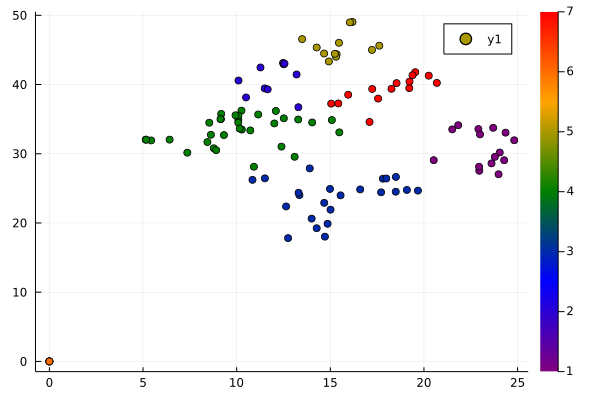

In [12]:
#Plots to view the resultant clustering
using Plots
scatter(df2.Latitude, df2.Longitude,
        marker_z = result.assignments,
        color =:rainbow, legend = true)

In [13]:
#Mapping storenum to its corresponding cluster
store_clus = Dict()
for i in 1:size(df2,1)
    store_clus[df2.Storenum[i]] = result.assignments[i]
end

In [14]:
store_clus

Dict{Any, Any} with 111 entries:
  597 => 4
  519 => 5
  586 => 1
  501 => 5
  627 => 4
  660 => 3
  650 => 7
  510 => 4
  556 => 4
  657 => 5
  547 => 4
  530 => 1
  612 => 3
  505 => 2
  629 => 5
  665 => 7
  567 => 6
  638 => 5
  506 => 7
  524 => 5
  518 => 3
  603 => 3
  661 => 4
  651 => 4
  658 => 4
  ⋮   => ⋮

In [15]:
#Save the mappings for further use
save("store_clus.jld2", "store_clus", store_clus)

# Word2Vec-storenum,sales number,sales channel

In [2]:
#loading the dataset for unique channels in particular quarter
df = DataFrame(CSV.File("Datasetq1.csv"))

,storenum,item_key,item_description,transaction_type,sales_amount,sales_channel
,Int64,Int64,String,String,Float64,String
1,502,9999994,*BF Eat In*,M,0.0,Breakfast (BF)
2,502,1,CASH,T,9.34579,Breakfast (BF)
3,502,1,CASH,T,-9.34579,Breakfast (BF)
4,502,914335,9P FFST,M,28.9252,Take Away (TA)
5,502,1,CASH,T,32.7103,Take Away (TA)
6,502,1,CASH,T,-3.78505,Take Away (TA)
7,502,200002,PEPSI -R,M,2.2897,Take Away (TA)
8,502,200020,ICED MILO -R,M,3.1776,Take Away (TA)
9,502,1,CASH,T,9.34579,Take Away (TA)


In [3]:
#getting unique channels
sales_channel = unique(df.sales_channel)

17-element Vector{String}:
 "Breakfast (BF)"
 "Take Away (TA)"
 "Foodpanda Breakfast"
 "Foodpanda Daypart"
 "Drive-Thru"
 "Eat In (EI)"
 "Grabfood Breakfast"
 "Grabfood Daypart"
 "Self-Ordering TA"
 "Deliveroo Breakfast"
 "Deliveroo Daypart"
 "Online-Delivery"
 "Phone-Delivery"
 "Self-Ordering EI"
 "Phone-Pickup"
 "Catering"
 "Online-Pickup"

In [14]:
# Remove spaces from a string,Input-string,Output-string
function remove_space(s)
    s1 = ""
    for i in 1:length(s)
        if(!isspace(s[i]))
            s1 = s1 * s[i]
        end
    end
    return s1
end

remove_space (generic function with 1 method)

In [22]:
#text preparation for Word2Vec training of storenum,sales number,sales channel 
for num_clus = 7
text = ""
sales_div = ["Sales_0-3","Sales_3-6","Sales_6-8","Sales_8-11","Sales_11-18","Sales_18-22","Sales_22-50"]
for i in 1:length(sales_div)
    text = text * sales_div[i] * "\n"
end
for i in 1:num_clus
    text = text * "Store_Cluster-" * string(i) * "\n"
end
for i in 1:length(sales_channel)
    text = text * remove_space(sales_channel[i]) * "\n"
end

In [23]:
text

"Sales_0-3\nSales_3-6\nSales_6-8\nSales_8-11\nSales_11-18\nSales_18-22\nSales_22-50\nStore_Cluster-1\nStore_Cluster-2\nStore_Cluster-3\nStore_Cluster-4\nStore_Cluster-5\nStore_Cluster-6\nStore_Cluster-7\nEatIn(EI)\nTakeAway(TA)\nDrive-Thru\nFoodpandaDaypart\nDeliverooDaypart\nBreakfast(BF)\nSelf-OrderingEI\nSelf-OrderingTA\nOnline-Delivery\nPhone-Delivery\nPhone-Pickup\nGrabfoodDaypart\nFoodpandaBreakfast\nGrabfoodBreakfast\nCatering\nDeliverooBreakfast\nBirthday/KidsTour\nOnline-Pickup\n"

In [24]:
#save the text file
open("text_store_sales_channel.txt", "w") do io
           write(io, text)
       end;

In [1]:
using Word2Vec

In [29]:
#Word2vec Training needs to be in Linux-based Sysytem
#training the word2vec using text data
word2vec("text_store_sales_channel.txt", "text_store_sales_channel-vec.txt",size = 20 ,iter = 20 ,min_count = 1, verbose=true)

Starting training using file text_store_sales_channel.txt
Vocab size: 33
Words in train file: 64


Process(`/opt/julia/artifacts/0c86f7feb8f6b4ab5f9fb793f1fde1278e3a6021/bin/word2vec -train text_store_sales_channel.txt -output text_store_sales_channel-vec.txt -size 20 -window 5 -sample 0.001 -hs 0 -negative 5 -threads 12 -iter 20 -min-count 1 -alpha 0.025 -debug 2 -binary 0 -cbow 1`, ProcessExited(0))

In [2]:
#loading model and vocabulary
model = wordvectors("text_store_sales_channel-vec.txt")
words = vocabulary(model)

33-element Vector{String}:
 "</s>"
 "Sales_0-3"
 "Sales_3-6"
 "Sales_6-8"
 "Sales_8-11"
 "Sales_11-18"
 "Sales_18-22"
 "Sales_22-50"
 "Store_Cluster-1"
 "Store_Cluster-2"
 "Store_Cluster-3"
 "Store_Cluster-4"
 "Store_Cluster-5"
 ⋮
 "Self-OrderingEI"
 "Self-OrderingTA"
 "Online-Delivery"
 "Phone-Delivery"
 "Phone-Pickup"
 "GrabfoodDaypart"
 "FoodpandaBreakfast"
 "GrabfoodBreakfast"
 "Catering"
 "DeliverooBreakfast"
 "Birthday/KidsTour"
 "Online-Pickup"

# Embedding Generation

In [3]:
using CSV
using DataFrames

In [3]:
#Getting sales division group,Input-float,Output-string
function get_sales_div(sales)
    sales_div = ["Sales_0-3","Sales_3-6","Sales_6-8","Sales_8-11","Sales_11-18","Sales_18-22","Sales_22-50"]
    if(sales >=0.0 && sales<=3.0)
        return sales_div[1]
    elseif(sales >3.0 && sales <=6.0)
        return sales_div[2]
    elseif(sales >6.0 && sales <=8.0)
        return sales_div[3]
    elseif(sales >8.0 && sales <=11.0)
        return sales_div[4]        
    elseif(sales >11.0 && sales <=18.0)
        return sales_div[5]
    elseif(sales >18.0 && sales <=22.0)
        return sales_div[6]
    else
        return sales_div[7]
    end
end

get_sales_div (generic function with 1 method)

In [4]:
#Getting store division group,Input-int,Output-string
function get_store_clus(store)
    x = "Store_Cluster-" * string(store_clus[store])
    return x
end

get_store_clus (generic function with 1 method)

In [11]:
#Genearating emb_partial(containing embedding for storenum,sales amount division, channel) and 
#emb_all((containing embedding for storenum,sales amount division, channel and products description))
function generate_embedding(df,df1,lower,upper)
    emb_partial = vcat(get_vector(model,get_store_clus(df.storenum[lower])),get_vector(model,get_sales_div(df.sales[lower])),get_vector(model,remove_space(df.sales_channel[lower])))
    emb_all = vcat(emb_partial,(df1[lower,1:20]))
    for i in (lower+1):upper
        x = vcat(get_vector(model,get_store_clus(df.storenum[i])),get_vector(model,get_sales_div(df.sales[i])),get_vector(model,remove_space(df.sales_channel[i])))
        emb_partial = hcat(emb_partial,x)
        emb_all = hcat(emb_all,vcat(x,(df1[i,1:20])))
    end
    return emb_partial,emb_all
end

generate_embedding (generic function with 1 method)

In [12]:
#Batchwise preparation of embedding
function get_embedding(df,df1,batch)
    max_length = size(df,1)
    emb_partial,emb_all = generate_embedding(df,df1,1,1)
    count = 2
    while (count<=max_length)
        lower = count
        upper = count + batch
        if(upper>max_length)
            upper = max_length
        end
        count = upper + 1
        x,y = generate_embedding(df,df1,lower,upper)
        emb_partial = hcat(emb_partial,x)
        emb_all = hcat(emb_all,y)
        println(lower," ",upper)
    end
    return emb_partial,emb_all
end

get_embedding (generic function with 1 method)

In [7]:
#embeddings preparation clusterwise Input:quarter,daypart,cluster number
function embed(cl,daypart,i)
    path = cl * "_" * daypart * "_embedding_Cluster$i.csv"
    df = DataFrame(CSV.File(path))
    df1 = Matrix(df[:,3:22])
    
    emb_partial,emb_all = get_embedding(df,df1,10000)
    
    df_partial = DataFrame(emb_partial')
    df_all = DataFrame(emb_all')
    
    CSV.write(cl * "_" * daypart * "_emb_partial$i.csv",df_partial)
    CSV.write(cl * "_" * daypart * "_emb_all$i.csv",df_all)
end

embed (generic function with 1 method)

In [8]:
#load mapping of store to its corresponding geographical group
using JLD2, FileIO
store_clus = load("store_clus.jld2")["store_clus"]

Dict{Any, Any} with 111 entries:
  597 => 4
  519 => 5
  586 => 1
  501 => 5
  627 => 4
  660 => 3
  650 => 7
  510 => 4
  556 => 4
  657 => 5
  547 => 4
  530 => 1
  612 => 3
  505 => 2
  629 => 5
  665 => 7
  567 => 6
  638 => 5
  506 => 7
  524 => 5
  518 => 3
  603 => 3
  661 => 4
  651 => 4
  658 => 4
  ⋮   => ⋮

In [11]:
#Embeddings(emb_all,emb_partila) prepared clusterwise

#This cell takes prolonged time (>30 minutes)

segment = ["Breakfast_Weekday","Breakfast_Weekend","Lunch_Weekday","Lunch_Weekend","Dinner_Weekday","Dinner_Weekend"]
cluster = [2,1,6,4,3,3]

for j in 1:6
    for i in 1:cluster[j]
        embed("q1",segment[j],i)
        println(i)
    end
    println(j)
end

2 10002
10003 20003
20004 30004
30005 40005
40006 50006
50007 60007
60008 70008
70009 80009
80010 90010
90011 100011
100012 110012
110013 120013
120014 130014
130015 140015
140016 150016
150017 160017
160018 170018
170019 180019
180020 190020
190021 200021
200022 207848
1


# Quarterwise embedding preparation(required input for GAN)

In [1]:
using CSV
using DataFrames

In [2]:
#Quarterwise embedding combination Input:quarter,segment,cluster number,df_final,df_all,df_partial
#df_final-dataframe containing storenum,sales,channel,product combination embeddings
#df_all-dataframe for emb_all
#df_partial-dataframe for emb_partial
function emb_comb(quarter,segment,c,df_final,df_all,df_partial)
    path = quarter * "_" * segment * "_embedding_Cluster$c.csv"
    df = DataFrame(CSV.File(path))
    
    st = segment * string(c)
    arr_seg = []
    n = size(df,1)
    for i in 1:n
        push!(arr_seg,st)
    end
    df.seg = arr_seg
    
    df_final = vcat(df_final,df)
    
    path_all = quarter * "_" * segment * "_emb_all$c.csv"
    df_a = DataFrame(CSV.File(path_all))
    
    path_partial = quarter * "_" * segment * "_emb_partial$c.csv"
    df_p = DataFrame(CSV.File(path_partial))
    
    df_all = vcat(df_all,df_a)
    df_partial = vcat(df_partial,df_p)
    
    return df_final,df_all,df_partial
end 

emb_comb (generic function with 1 method)

In [3]:
#Quarterwise emb_all,emb_partial prep
segment = ["Breakfast_Weekday","Breakfast_Weekend","Lunch_Weekday","Lunch_Weekend","Dinner_Weekday","Dinner_Weekend"]
cluster = [2,1,6,4,3,3]
arr = []

df_final = DataFrame()
df_all = DataFrame()
df_partial = DataFrame()

for j in 1:6
    for i in 1:cluster[j]
        df_final,df_all,df_partial = emb_comb("q1",segment[j],i,df_final,df_all,df_partial)
        println(i)
    end
    println(j)
end

1
2
1
1
2
1
2
3
4
5
6
3
1
2
3
4
4
1
2
3
5
1
2
3
6


In [4]:
#Save df_final
CSV.write("q4_embedding_Cluster.csv",df_final)

"q4_embedding_Cluster.csv"

In [5]:
#Save df_all
CSV.write("q4_emb_all.csv",df_all)

"q4_emb_all.csv"

In [6]:
#Save df_partial
CSV.write("q4_emb_partial.csv",df_partial)

"q4_emb_partial.csv"

# Dictionaries for tracking segmentwise beginning and ending index 

In [7]:
#Prepare dataframe containing segments
segment = ["Breakfast_Weekday","Breakfast_Weekend","Lunch_Weekday","Lunch_Weekend","Dinner_Weekday","Dinner_Weekend"]
cluster = [2,1,6,4,3,3]

arr = []

for i in 1:6
    for j in 1:cluster[i]
        push!(arr,segment[i]*string(j))
    end
end

df = DataFrame()
df.seg = arr

19-element Vector{Any}:
 "Breakfast_Weekday1"
 "Breakfast_Weekday2"
 "Breakfast_Weekend1"
 "Lunch_Weekday1"
 "Lunch_Weekday2"
 "Lunch_Weekday3"
 "Lunch_Weekday4"
 "Lunch_Weekday5"
 "Lunch_Weekday6"
 "Lunch_Weekend1"
 "Lunch_Weekend2"
 "Lunch_Weekend3"
 "Lunch_Weekend4"
 "Dinner_Weekday1"
 "Dinner_Weekday2"
 "Dinner_Weekday3"
 "Dinner_Weekend1"
 "Dinner_Weekend2"
 "Dinner_Weekend3"

In [8]:
#Supposing min and max value of index
mi = 4000000
ma = -1

-1

In [9]:
#Declaring dictionaries for beginning and ending index corresponding to each segment
q1_dict_beg = Dict()
q1_dict_end = Dict()

for i in 1:19
    q1_dict_beg[df.seg[i]] = mi
    q1_dict_end[df.seg[i]] = ma
end 

In [10]:
#Preparing dictionaries for beginning and ending index corresponding to each segment
for i in 1:size(df_final,1)
    q1_dict_beg[df_final.seg[i]] = min(q1_dict_beg[df_final.seg[i]],i)
    q1_dict_end[df_final.seg[i]] = max(q1_dict_beg[df_final.seg[i]],i)
end

In [11]:
#Save dictionary containg beginning index
using JLD2, FileIO
save("q1_dict_beg.jld2", "q1_dict_beg", q1_dict_beg)

In [12]:
#Save dictionary containg ending index
save("q1_dict_end.jld2", "q1_dict_end", q1_dict_end)

In [13]:
#loading dictionaries
using JLD2, FileIO
q1_dict_beg = load("q1_dict_beg.jld2")["q1_dict_beg"]
q1_dict_end = load("q1_dict_end.jld2")["q1_dict_end"]

Dict{Any, Any} with 19 entries:
  "Lunch_Weekend4"     => 1999284
  "Lunch_Weekday3"     => 1224320
  "Lunch_Weekday2"     => 1168209
  "Dinner_Weekend1"    => 2965884
  "Breakfast_Weekday2" => 363225
  "Lunch_Weekday4"     => 1482559
  "Dinner_Weekday2"    => 2800887
  "Dinner_Weekday3"    => 2842127
  "Dinner_Weekday1"    => 2481257
  "Dinner_Weekend2"    => 2982096
  "Lunch_Weekday5"     => 1533706
  "Lunch_Weekday1"     => 1074946
  "Lunch_Weekend3"     => 1978136
  "Lunch_Weekend2"     => 1735060
  "Lunch_Weekend1"     => 1615818
  "Breakfast_Weekday1" => 332583
  "Breakfast_Weekend1" => 554100
  "Lunch_Weekday6"     => 1576132
  "Dinner_Weekend3"    => 3168740